In [1]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing packages
import pandas as pd
import numpy as np
import datetime
import wbdata
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook" # use "pio.renderers" to see the default renderer

In [3]:
wbdata.get_indicators(source=1)

id                                                 name
-------------------------------------------------  ---------------------------------------------------------------------------------------------------------------
ENF.CONT.COEN.ATDR                                 Enforcing contracts: Alternative dispute resolution (0-3) (DB16-20 methodology)
ENF.CONT.COEN.ATFE.PR                              Enforcing contracts: Attorney fees (% of claim)
ENF.CONT.COEN.COST.ZS                              Enforcing contracts: Cost (% of claim)
ENF.CONT.COEN.COST.ZS.DFRN                         Enforcing contracts: Cost (% of claim) - Score
ENF.CONT.COEN.CSMG                                 Enforcing contracts: Case management (0-6) (DB16-20 methodology)
ENF.CONT.COEN.CTAU                                 Enforcing contracts: Court automation (0-4) (DB17-20 methodology)
ENF.CONT.COEN.CTFE.PR                              Enforcing contracts: Court fees (% of claim)
ENF.CONT.COEN.CTSP.DB1719         

In [4]:
countries = ['LKA']

In [5]:
indicators = {"DT.DOD.DLXF.CD": "External_Debts","DT.DOD.DIMF.CD":"IMF_Credit","DT.DOD.DSTC.CD":"Short_term_debt","BM.GSR.TOTL.CD": "Income","FI.RES.TOTL.CD":"Total_Reserves","NY.GNP.MKTP.CD":"Gross_income","BX.GSR.TOTL.CD":"Exports","NE.DAB.TOTL.CN":"National_Expenditure"}

In [6]:
df = wbdata.get_dataframe(indicators, country=countries, parse_dates=True, keep_levels =True)

In [7]:
df

External_Debts    IMF_Credit  Short_term_debt  \
country   date                                                        
Sri Lanka 2023-01-01             NaN           NaN              NaN   
          2022-01-01    4.779517e+10  2.326445e+09     8.591040e+09   
          2021-01-01    4.751344e+10  2.592731e+09     8.626347e+09   
          2020-01-01    4.655175e+10  1.926646e+09     8.396051e+09   
          2019-01-01    4.581248e+10  1.863620e+09     8.441756e+09   
...                              ...           ...              ...   
          1964-01-01             NaN           NaN              NaN   
          1963-01-01             NaN           NaN              NaN   
          1962-01-01             NaN           NaN              NaN   
          1961-01-01             NaN           NaN              NaN   
          1960-01-01             NaN           NaN              NaN   

                            Income  Total_Reserves  Gross_income  \
country   date                                                     
Sri Lanka 2023-01-01           NaN             NaN           NaN   
          2022-01-01  2.136731e+10             NaN  7.248908e+10   
          2021-01-01  2.360127e+10    3.136992e+09  8.655805e+10   
          2020-01-01  2.067499e+10    5.663994e+09  8.216100e+10   
          2019-01-01  2.727543e+10    7.648305e+09  8.654557e+10   
...                            ...             ...           ...   
          1964-01-01           NaN    5.200000e+07  1.306652e+09   
          1963-01-01           NaN    7.500000e+07  1.223818e+09   
          1962-01-01           NaN    8.500000e+07  1.438767e+09   
          1961-01-01           NaN    9.000000e+07  1.407027e+09   
          1960-01-01           NaN    1.012600e+08  1.406433e+09   

                           Exports  National_Expenditure  
country   date                                            
Sri Lanka 2023-01-01           NaN                   NaN  
          2022-01-01  1.641819e+10          2.500518e+13  
          2021-01-01  1.508949e+10          1.890124e+13  
          2020-01-01  1.328110e+10          1.663751e+13  
          2019-01-01  1.966608e+10          1.683039e+13  
...                            ...                   ...  
          1964-01-01           NaN          8.071382e+09  
          1963-01-01           NaN          7.686128e+09  
          1962-01-01           NaN          7.140207e+09  
          1961-01-01           NaN          7.084459e+09  
          1960-01-01           NaN          7.034331e+09  

[64 rows x 8 columns]

In [8]:
df = pd.DataFrame(df.to_records())

def formatNum(x):
    """Creating a function that will change units to billions and round to 0 decimal places"""
    y = x/1000000000
    z = round(y)
    return(z)

df = df.replace(np.nan, 0)
df['Income'] = df['Income'].apply(formatNum)
df['External_Debts'] = df['External_Debts'].apply(formatNum)
df['Total_Reserves'] = df['Total_Reserves'].apply(formatNum)
df['IMF_Credit'] = df['IMF_Credit'].apply(formatNum)
df['Short_term_debt'] = df['Short_term_debt'].apply(formatNum)
df['Gross_income'] = df['Gross_income'].apply(formatNum)
df['Exports'] = df['Exports'].apply(formatNum)
df['National_Expenditure'] = df['National_Expenditure'].apply(formatNum)

In [9]:
df

,country,date,External_Debts,IMF_Credit,Short_term_debt,Income,Total_Reserves,Gross_income,Exports,National_Expenditure
0,Sri Lanka,2023-01-01,0,0,0,0,0,0,0,0
1,Sri Lanka,2022-01-01,48,2,9,21,0,72,16,25005
2,Sri Lanka,2021-01-01,48,3,9,24,3,87,15,18901
3,Sri Lanka,2020-01-01,47,2,8,21,6,82,13,16638
4,Sri Lanka,2019-01-01,46,2,8,27,8,87,20,16830
...,...,...,...,...,...,...,...,...,...,...
59,Sri Lanka,1964-01-01,0,0,0,0,0,1,0,8
60,Sri Lanka,1963-01-01,0,0,0,0,0,1,0,8
61,Sri Lanka,1962-01-01,0,0,0,0,0,1,0,7
62,Sri Lanka,1961-01-01,0,0,0,0,0,1,0,7


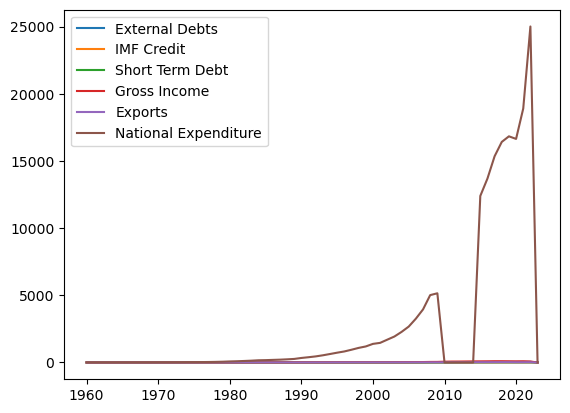

In [11]:
plt.figure()
plt.plot(df['date'],df['External_Debts'],label='External Debts')
plt.plot(df['date'],df['IMF_Credit'],label='IMF Credit')
plt.plot(df['date'],df['Short_term_debt'],label='Short Term Debt')
plt.plot(df['date'],df['Gross_income'],label='Gross Income')
plt.plot(df['date'],df['Exports'],label='Exports')
plt.plot(df['date'],df['National_Expenditure'],label='National Expenditure')
plt.legend()
plt.show()